<a href="https://colab.research.google.com/github/GVGunasekhar/Weather-Trend-Forecasting/blob/main/Tech_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Weather Trend Forecasting


Objective
Analyze the "Global Weather Repository.csv" dataset to forecast future weather trends and showcase data science skills through both basic and advanced techniques. This dataset provides Daily weather information for cities around the world. This dataset offers a comprehensive set of features that reflect the weather conditions worldwide. It includes over 40 features.

Note: You can choose between completing the basic or advanced assessments. Showcasing advanced analyses can reflect a higher level of skill, but fulfilling either set of requirements is acceptable.


#Basic Assessment

Data Cleaning & Preprocessing

Data Loading

In [49]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 50.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

In [ ]:


# Load dataset (Replace 'your_dataset.csv' with actual file path)
df = pd.read_csv('/content/GlobalWeatherRepository.csv')

# Display first few rows
print(df.head())


       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy

In [11]:
# Display basic info
print(df.info())

# Display summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 14695 entries, 0 to 58657
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       14695 non-null  object 
 1   location_name                 14695 non-null  object 
 2   latitude                      14695 non-null  float64
 3   longitude                     14695 non-null  float64
 4   timezone                      14695 non-null  object 
 5   last_updated_epoch            14695 non-null  float64
 6   last_updated                  14695 non-null  object 
 7   temperature_celsius           14695 non-null  float64
 8   temperature_fahrenheit        14695 non-null  float64
 9   condition_text                14695 non-null  object 
 10  wind_mph                      14695 non-null  float64
 11  wind_kph                      14695 non-null  float64
 12  wind_degree                   14695 non-null  float64
 13  wind_d



*   Handle missing values, outliers, and normalize data.





In [8]:
# Fill missing values for numerical columns with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill missing values for categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("Missing values handled")


Missing values handled


In [9]:
import numpy as np

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Selecting numeric columns to process (excluding latitude & longitude)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('latitude')
numeric_cols.remove('longitude')

df = remove_outliers_iqr(df, numeric_cols)

print("Outliers handled")


Outliers handled


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Data normalized")
print(df.head())


Data normalized
               country location_name  latitude  longitude  \
0          Afghanistan         Kabul     34.52      69.18   
5  Antigua and Barbuda  Saint John's     17.12     -61.85   
6            Argentina  Buenos Aires    -34.59     -58.67   
8            Australia      Canberra    -35.28     149.22   
9              Austria        Vienna     48.20      16.37   

                         timezone  last_updated_epoch      last_updated  \
0                      Asia/Kabul                 0.0  2024-05-16 13:15   
5                 America/Antigua                 0.0  2024-05-16 04:45   
6  America/Argentina/Buenos_Aires                 0.0  2024-05-16 05:45   
8                Australia/Sydney                 0.0  2024-05-16 18:45   
9                   Europe/Vienna                 0.0  2024-05-16 10:45   

   temperature_celsius  temperature_fahrenheit condition_text  ...  \
0             0.574519                0.574099  Partly Cloudy  ...   
5             0.560096    

#Exploratory Data Analysis (EDA)




*   Perform basic EDA to uncover the trends, correlations, and patterns.


*  Generate visualizations for temperature and precipitation.



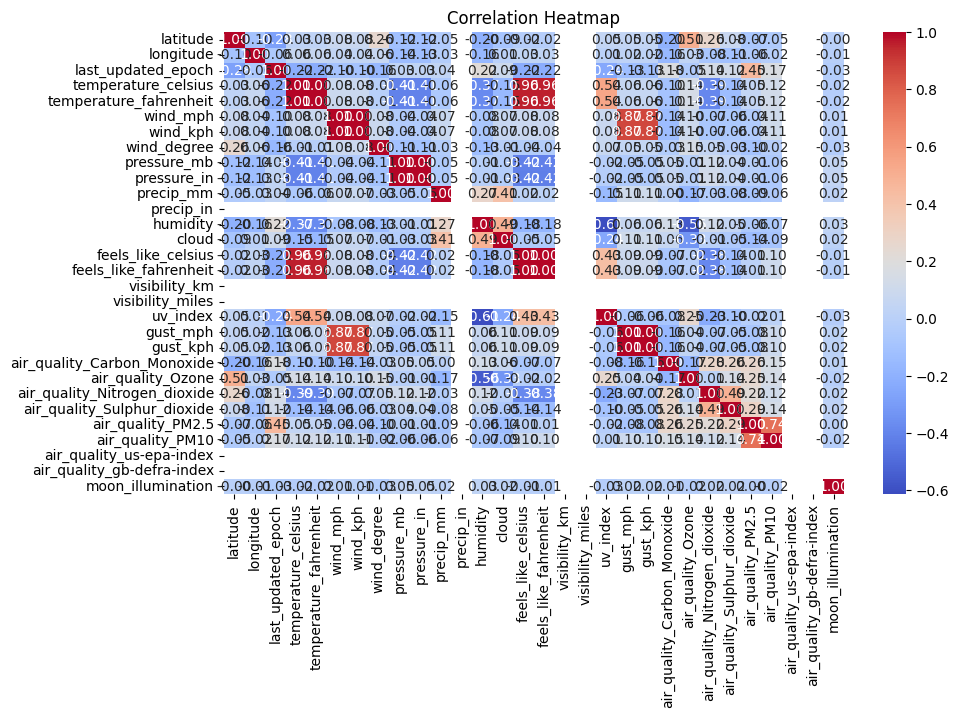

In [14]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


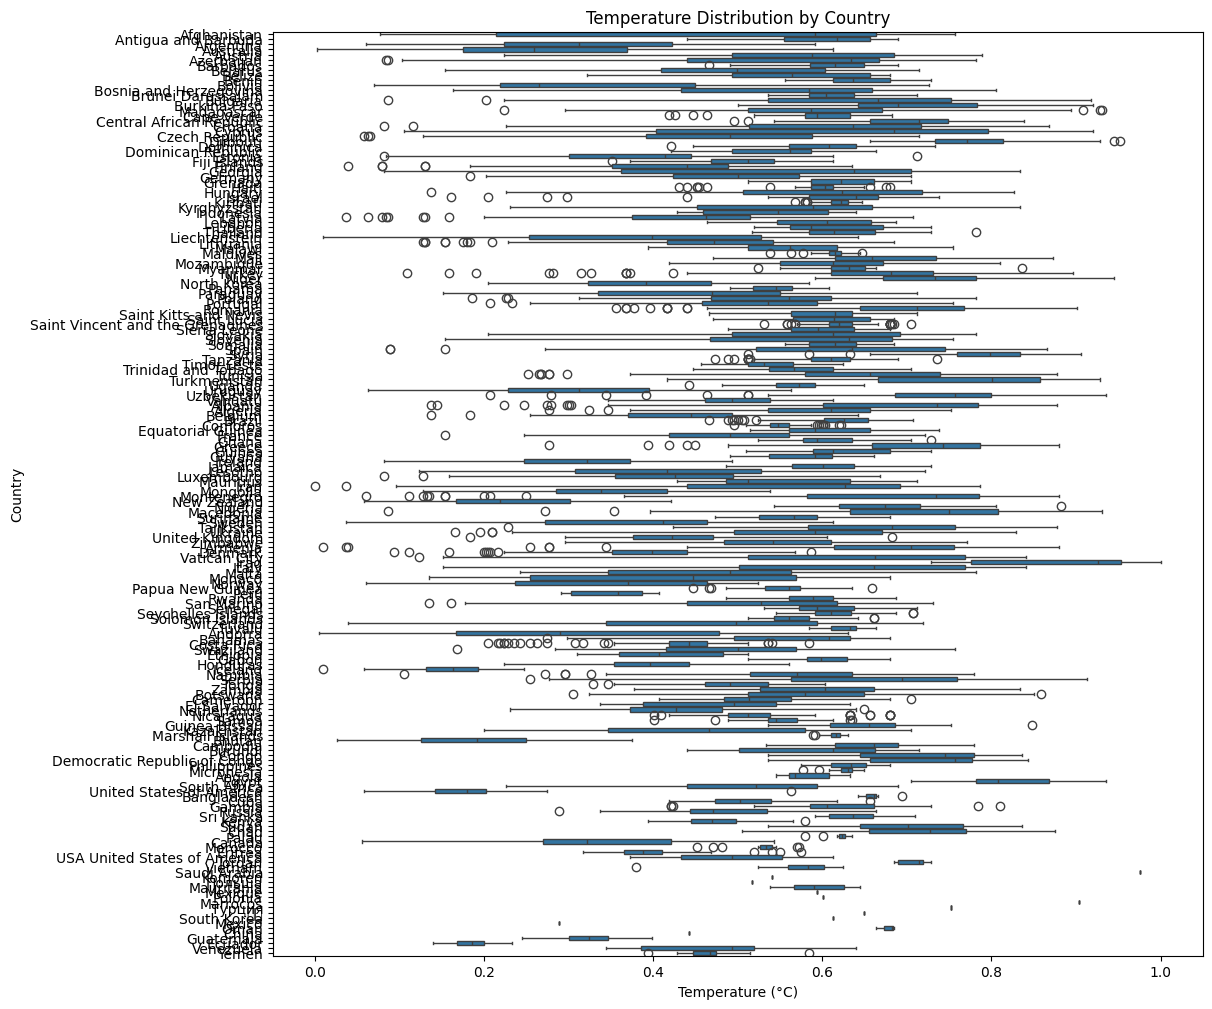

In [21]:
#Temperature Trends Over Locations
plt.figure(figsize=(12, 12))
sns.boxplot(x='temperature_celsius', y='country', data=df)
plt.title("Temperature Distribution by Country")
plt.xlabel("Temperature (°C)")
plt.ylabel("Country")
plt.show()


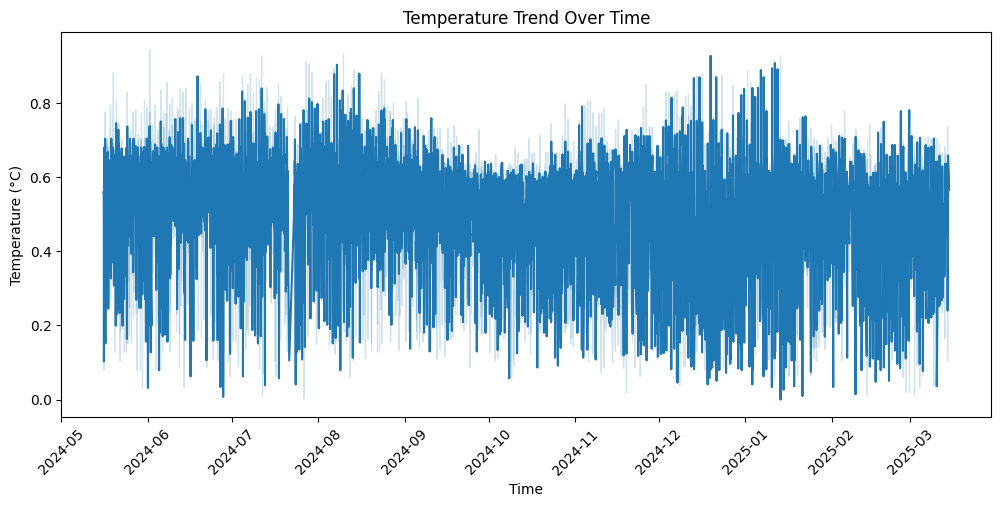

In [22]:
#Temperature Trends Over Time
df['last_updated'] = pd.to_datetime(df['last_updated'])  # Convert time column
df.sort_values('last_updated', inplace=True)

plt.figure(figsize=(12, 5))
sns.lineplot(x='last_updated', y='temperature_celsius', data=df)
plt.title("Temperature Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()


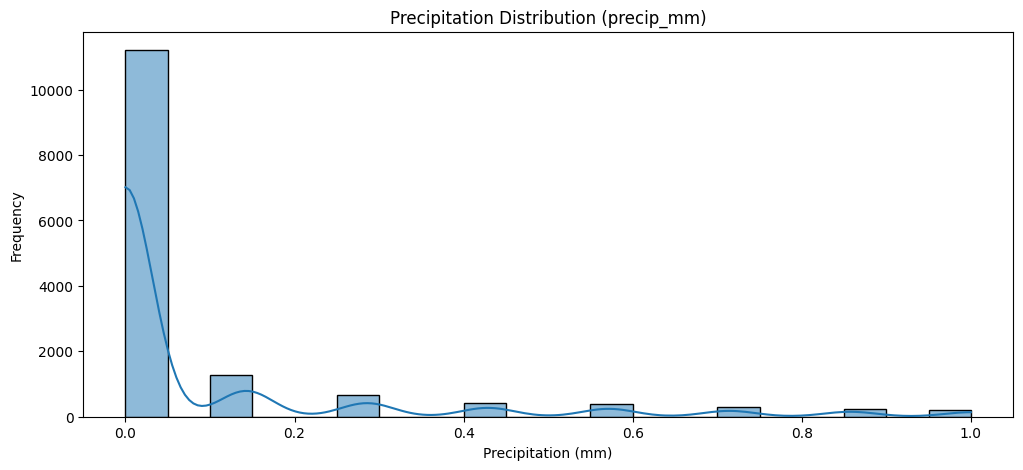

In [23]:
# Check if precipitation column exists
precip_cols = [col for col in df.columns if 'precip' in col.lower()]
if precip_cols:
    plt.figure(figsize=(12, 5))
    sns.histplot(df[precip_cols[0]], bins=20, kde=True)
    plt.title(f"Precipitation Distribution ({precip_cols[0]})")
    plt.xlabel("Precipitation (mm)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No precipitation column found in dataset.")


#Model Building


*  Build a basic forecasting model and evaluate its performance using different metrics.

*   Use lastupdated feature for the time series analysis.



<ipython-input-42-accb082c58c8>:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean().interpolate()
<ipython-input-42-accb082c58c8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted'] = predictions


RMSE: 1.42
MAE: 0.99


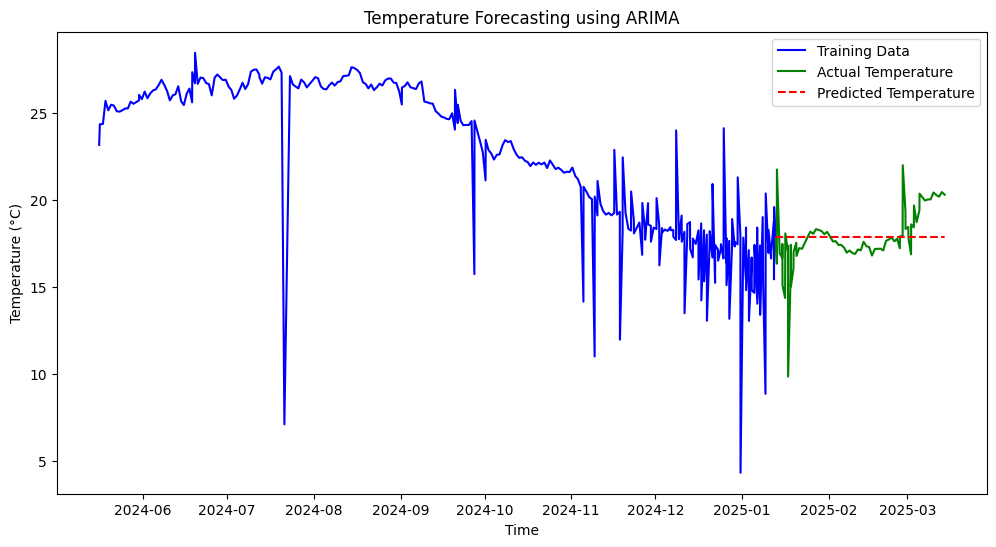

In [42]:
# 🔹 Load dataset
df = pd.read_csv('/content/GlobalWeatherRepository.csv')

# 🔹 Convert 'last_updated_epoch' (Unix timestamp) to datetime
df['last_updated'] = pd.to_datetime(df['last_updated_epoch'], unit='s')

# 🔹 Set 'last_updated' as the index and sort
df.set_index('last_updated', inplace=True)
df = df.sort_index()

# 🔹 Select target variable for forecasting
target_col = 'temperature_celsius'
df = df[[target_col]]  # Keep only the relevant column

# 🔹 Resample data to ensure uniform time intervals (e.g., hourly)
df = df.resample('H').mean().interpolate()

# 📌 Train-test split (80% training, 20% testing)
split_index = int(len(df) * 0.8)
train, test = df.iloc[:split_index], df.iloc[split_index:]

# 🔹 Fit ARIMA model (Auto-selection of p, d, q)
model = ARIMA(train[target_col], order=(5,1,0))  # (p=5, d=1, q=0) can be tuned
arima_model = model.fit()

# 🔹 Forecast for the test period
predictions = arima_model.forecast(steps=len(test))

# 🔹 Store predictions in test DataFrame
test['Predicted'] = predictions

# 📌 Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(test[target_col], test['Predicted']))
mae = mean_absolute_error(test[target_col], test['Predicted'])

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

# 🔹 Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train[target_col], label='Training Data', color='blue')
plt.plot(test[target_col], label='Actual Temperature', color='green')
plt.plot(test['Predicted'], label='Predicted Temperature', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Temperature Forecasting using ARIMA')
plt.show()

#Advanced Assessment



Advanced EDA


*  Implement anomaly detection to identify and analyze outliers.



<ipython-input-47-acdb4f50a78e>:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean().interpolate()


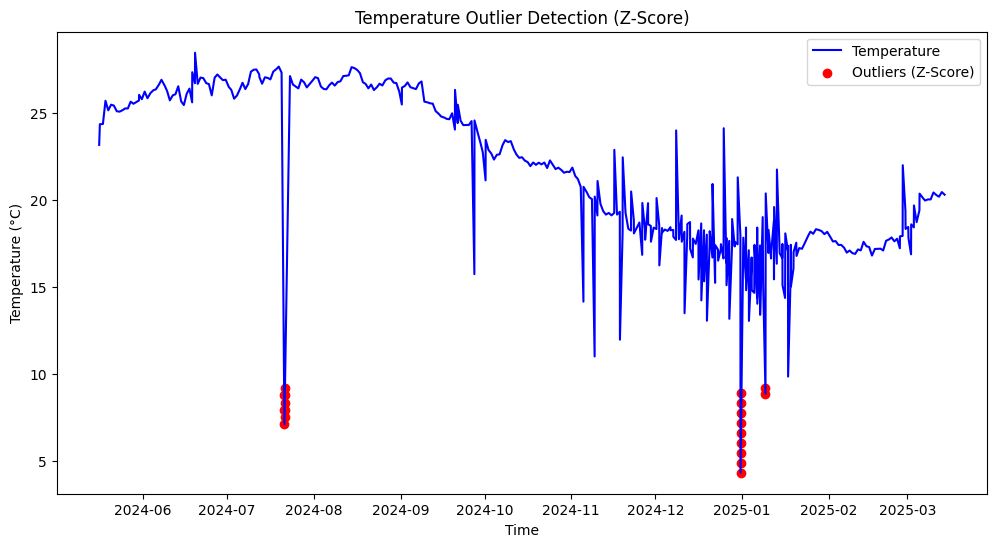


🔍 **Detected Outliers:**
                     temperature_celsius  z_outlier  iqr_outlier  iso_outlier
last_updated                                                                 
2024-07-21 06:00:00            12.148057      False        False         True
2024-07-21 07:00:00            11.306714      False        False         True
2024-07-21 08:00:00            10.465371      False        False         True
2024-07-21 09:00:00             9.624028      False        False         True
2024-07-21 10:00:00             8.782686       True        False         True
2024-07-21 11:00:00             7.941343       True        False         True
2024-07-21 12:00:00             7.100000       True        False         True
2024-07-21 13:00:00             7.516545       True        False         True
2024-07-21 14:00:00             7.933090       True        False         True
2024-07-21 15:00:00             8.349635       True        False         True


In [47]:
# 🔹 Load dataset
df = pd.read_csv('/content/GlobalWeatherRepository.csv')
# 🔹 Convert 'last_updated_epoch' (Unix timestamp) to datetime
df['last_updated'] = pd.to_datetime(df['last_updated_epoch'], unit='s')

# 🔹 Set 'last_updated' as the index and sort
df.set_index('last_updated', inplace=True)
df = df.sort_index()

# 🔹 Select target variable for anomaly detection
target_col = 'temperature_celsius'
df = df[[target_col]]  # Keep only the relevant column

# 🔹 Resample data to ensure uniform time intervals (e.g., hourly)
df = df.resample('H').mean().interpolate()

# 📌 1️⃣ **Z-Score Method for Outlier Detection**
df['z_score'] = zscore(df[target_col])  # Compute Z-score
df['z_outlier'] = df['z_score'].abs() > 3  # Mark outliers (Z > 3)

# 📌 2️⃣ **IQR Method for Outlier Detection**
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['iqr_outlier'] = (df[target_col] < lower_bound) | (df[target_col] > upper_bound)

# 📌 3️⃣ **Isolation Forest for Outlier Detection**
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['iso_outlier'] = iso_forest.fit_predict(df[[target_col]]) == -1  # -1 means outlier

# 🔹 Plot Outliers using Z-Score method
plt.figure(figsize=(12, 6))
plt.plot(df[target_col], label='Temperature', color='blue')
plt.scatter(df[df['z_outlier']].index, df[df['z_outlier']][target_col], color='red', label='Outliers (Z-Score)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Temperature Outlier Detection (Z-Score)')
plt.show()

# 🔹 Display Outliers Detected
outliers = df[df['z_outlier'] | df['iqr_outlier'] | df['iso_outlier']]
print("\n🔍 **Detected Outliers:**")
print(outliers[[target_col, 'z_outlier', 'iqr_outlier', 'iso_outlier']].head(10))

Forecasting with Multiple Models
  


* Build and compare multiple forecasting models
*   Create an ensemble of models to improve forecast accuracy.




In [2]:
!pip install prophet


In [ ]:
import os
os._exit(00)


<ipython-input-11-0fe39ac69a09>:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean().interpolate()
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1_fs4nik/us3ydf2s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1_fs4nik/q_0xxe2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55088', 'data', 'file=/tmp/tmp1_fs4nik/us3ydf2s.json', 'init=/tmp/tmp1_fs4nik/q_0xxe2c.json', 'output', 'file=/tmp/tmp1_fs4nik/prophet_modelfrc2qqwl/prophet_model-20250315065931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:59:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:59:33 - cmdstanpy - INFO - Chain [1] done processing
IN

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.1071
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.2994e-04
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0011
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0010
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.8592e-04
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.6125e-04
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.0893e-04
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.9285e-04
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.0141e-04
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8.0615e-04
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
📊 ARIMA -> RMSE: 1.423, MAE: 0.994
📊 Prophet -> RMSE: 4.322, MAE: 3.866
📊 LSTM -> RMSE: 0.473, MAE: 0.185
📊 Ensemble Model -> RMSE: 1.727, MAE: 1.400


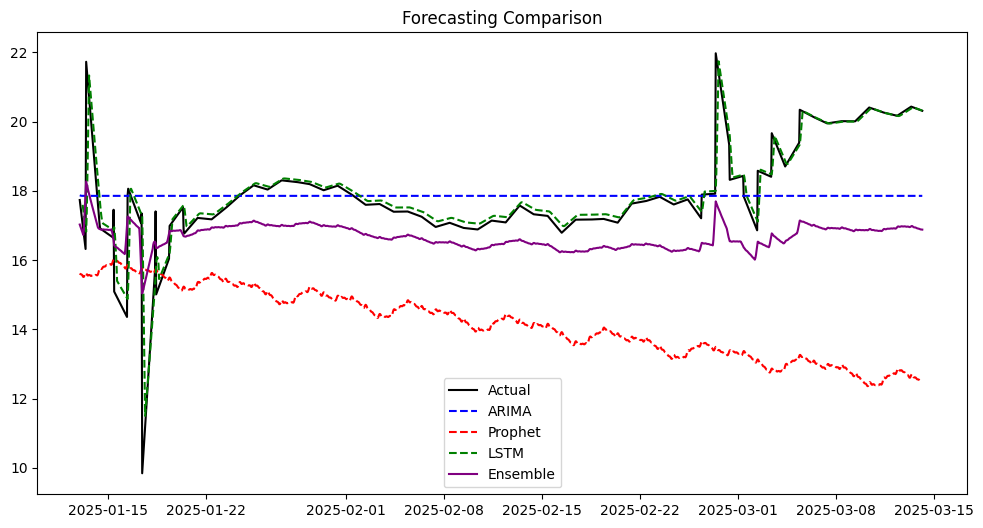

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet  # Updated import
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 🔹 Load dataset
df = pd.read_csv('/content/GlobalWeatherRepository.csv')

# 🔹 Convert 'last_updated_epoch' to datetime
df['last_updated'] = pd.to_datetime(df['last_updated_epoch'], unit='s')

# 🔹 Set 'last_updated' as index and sort
df.set_index('last_updated', inplace=True)
df = df.sort_index()

# 🔹 Select target variable
target_col = 'temperature_celsius'
df = df[[target_col]]

# 🔹 Resample data
df = df.resample('H').mean().interpolate()

# Split dataset
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# ==========================
# 📌 1️⃣ ARIMA Model
# ==========================
arima_model = ARIMA(train[target_col], order=(5, 1, 0))
arima_fitted = arima_model.fit()
arima_pred = arima_fitted.forecast(steps=len(test))

# ==========================
# 📌 2️⃣ Prophet Model
# ==========================
prophet_df = train.reset_index().rename(columns={'last_updated': 'ds', target_col: 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = test.reset_index().rename(columns={'last_updated': 'ds'})
prophet_pred = prophet_model.predict(future)['yhat'].values

# ==========================
# 📌 3️⃣ LSTM Model
# ==========================
# Prepare data
def create_lstm_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Scale data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

X_train, y_train = create_lstm_sequences(train_scaled)
X_test, y_test = create_lstm_sequences(test_scaled)

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

# Predict
lstm_pred = lstm_model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)

# ==========================
# 📌 Evaluate Model Performance
# ==========================
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f'📊 {model_name} -> RMSE: {rmse:.3f}, MAE: {mae:.3f}')
    return rmse, mae

arima_rmse, arima_mae = evaluate(test[target_col].values, arima_pred, 'ARIMA')
prophet_rmse, prophet_mae = evaluate(test[target_col].values, prophet_pred, 'Prophet')
lstm_rmse, lstm_mae = evaluate(test[target_col].values[5:], lstm_pred.flatten(), 'LSTM')

# ==========================
# 📌 Ensemble Model (Average Predictions) - Adjusted for shape mismatch
# ==========================
min_len = min(len(arima_pred), len(prophet_pred), len(lstm_pred.flatten()))
ensemble_pred = (arima_pred[:min_len] + prophet_pred[:min_len] + lstm_pred.flatten()[:min_len]) / 3
evaluate(test[target_col].values[:min_len], ensemble_pred, 'Ensemble Model')

# ==========================
# 📌 Plot Results
# ==========================
plt.figure(figsize=(12, 6))
plt.plot(test.index[:min_len], test[target_col].values[:min_len], label='Actual', color='black')  # Adjusted for min_len
plt.plot(test.index[:min_len], arima_pred[:min_len], label='ARIMA', linestyle='dashed', color='blue')  # Adjusted for min_len
plt.plot(test.index[:min_len], prophet_pred[:min_len], label='Prophet', linestyle='dashed', color='red')  # Adjusted for min_len
plt.plot(test.index[5:min_len + 5], lstm_pred.flatten()[:min_len], label='LSTM', linestyle='dashed', color='green')  # Adjusted for min_len and offset
plt.plot(test.index[:min_len], ensemble_pred, label='Ensemble', linestyle='solid', color='purple')  # Adjusted for min_len
plt.legend()
plt.title('Forecasting Comparison')
plt.show()

#Unique Analyses


* Climate Analysis: Study long-term climate patterns and variations in different regions.



In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/GlobalWeatherRepository.csv')

# Convert 'last_updated' to datetime and set as index
df['last_updated'] = pd.to_datetime(df['last_updated'])
df.set_index('last_updated', inplace=True)

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Resample using 'ME' (Month-End) and compute the mean for numeric columns
df_monthly = df[numeric_cols].resample('ME').mean()

# Display the first few rows
print(df_monthly.head())


               latitude  longitude  last_updated_epoch  temperature_celsius  \
last_updated                                                                  
2024-05-31    19.330079  21.252653        1.716476e+09            25.153214   
2024-06-30    19.169585  21.786945        1.718494e+09            26.456036   
2024-07-31    19.090607  22.195843        1.721096e+09            26.800448   
2024-08-31    19.107315  22.088584        1.723808e+09            26.789677   
2024-09-30    19.064397  22.147510        1.726441e+09            25.124402   

              temperature_fahrenheit  wind_mph   wind_kph  wind_degree  \
last_updated                                                             
2024-05-31                 77.275500  8.897635  14.322680   170.234384   
2024-06-30                 79.622507  9.127415  14.694197   178.421044   
2024-07-31                 80.242645  8.684089  13.979538   183.502419   
2024-08-31                 80.223093  8.643540  13.915649   180.594045   
20

<ipython-input-24-a549e08a0f77>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[numeric_cols].resample('M').mean()
<ipython-input-24-a549e08a0f77>:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[numeric_cols].resample('M').mean()


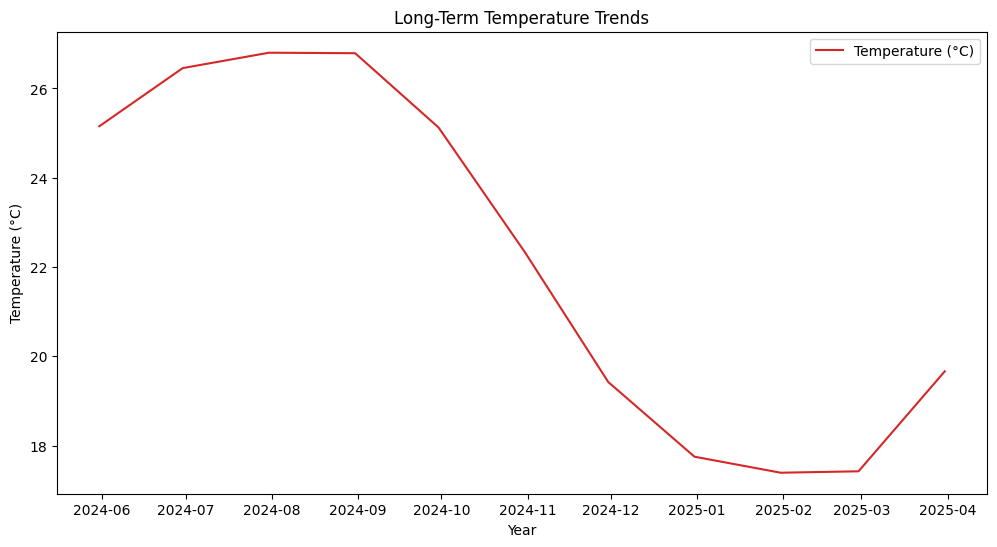

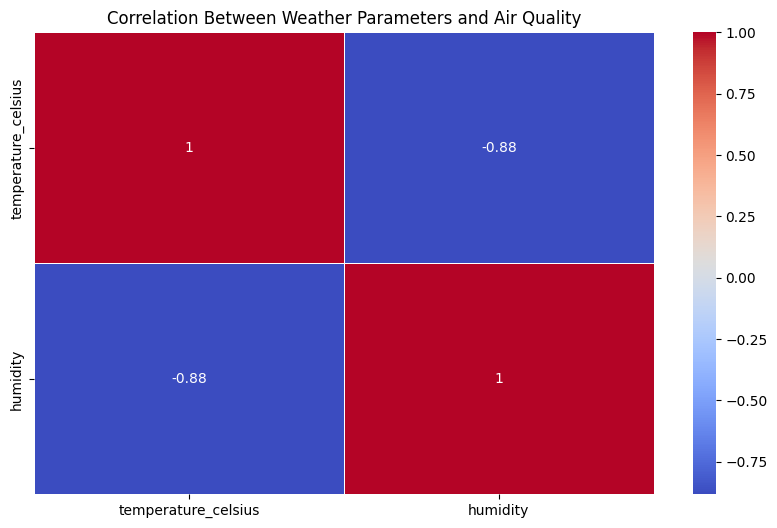

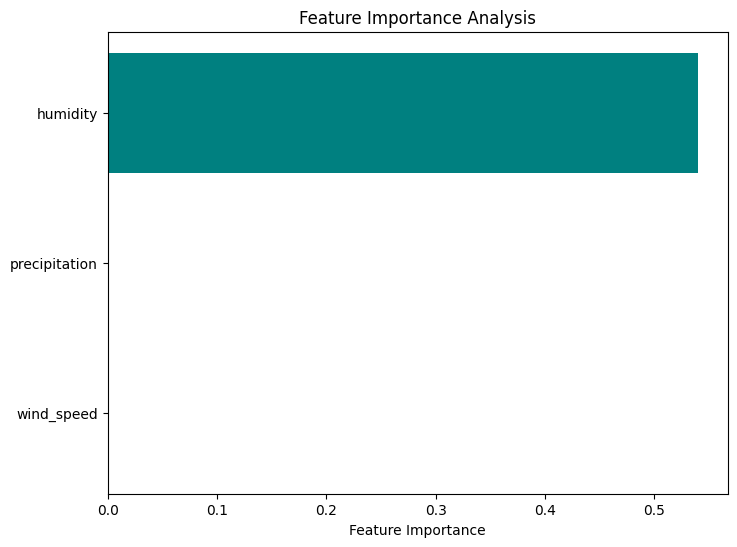

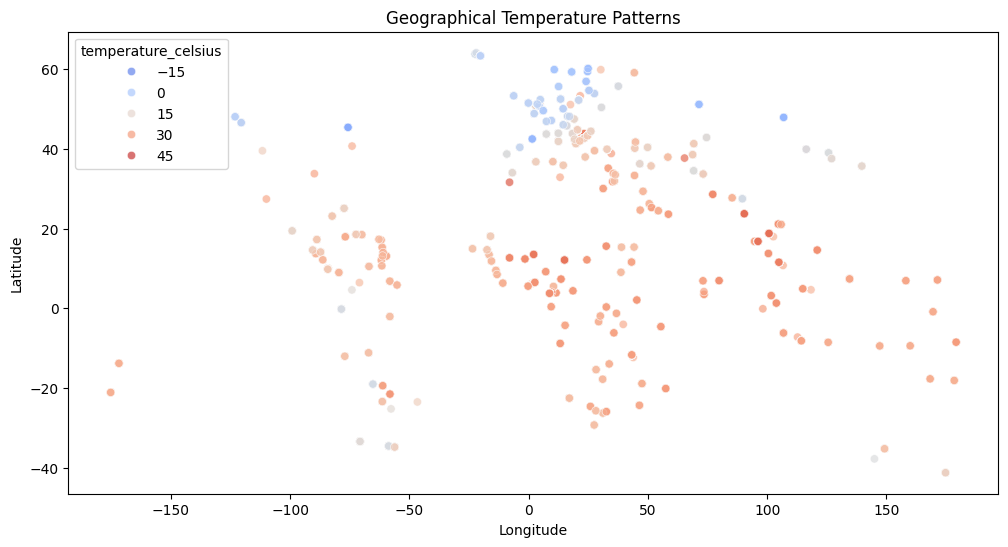

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


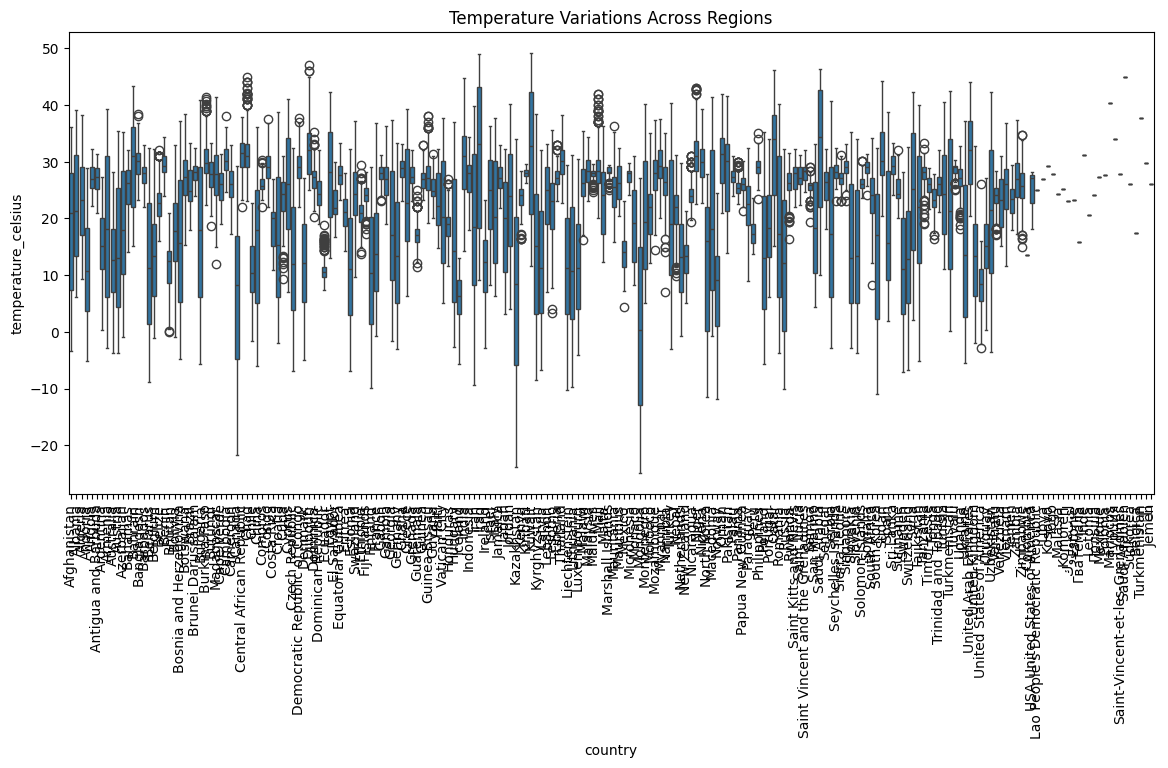

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Load dataset
df = pd.read_csv('/content/GlobalWeatherRepository.csv')

# Convert 'last_updated' to datetime and set as index
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
df.dropna(subset=['last_updated'], inplace=True)
df.set_index('last_updated', inplace=True)

# Select numeric columns for analysis
# Check the actual column names in your dataset using df.columns
# Adjust numeric_cols to include only existing columns
numeric_cols = ['temperature_celsius', 'humidity']  # Example: Only 'temperature_celsius' and 'humidity' are used

# Apply pd.to_numeric to the selected columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Resample data to monthly level
df_monthly = df[numeric_cols].resample('M').mean()
# Resample data to monthly level
df_monthly = df[numeric_cols].resample('M').mean()

# Climate Analysis: Long-term temperature trends
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['temperature_celsius'], label='Temperature (°C)', color='tab:red')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Long-Term Temperature Trends")
plt.legend()
plt.show()

# Environmental Impact: Correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df_monthly.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Weather Parameters and Air Quality")
plt.show()

# Feature Importance: Using Random Forest
# Reload the original dataframe to have all columns available
original_df = pd.read_csv('/content/GlobalWeatherRepository.csv')
original_df['last_updated'] = pd.to_datetime(original_df['last_updated'], errors='coerce')
original_df.dropna(subset=['last_updated'], inplace=True)
original_df.set_index('last_updated', inplace=True)

original_df.dropna(subset=numeric_cols, inplace=True)

# Ensure the columns exist in the DataFrame
required_cols = ['humidity', 'wind_speed', 'precipitation', 'temperature_celsius']
for col in required_cols:
    if col not in original_df.columns:
        # Handle missing columns appropriately, e.g., fill with 0 or drop rows
        original_df[col] = original_df.get(col, 0)  # Fill with 0 if missing

# Select features and target
X = original_df[['humidity', 'wind_speed', 'precipitation']]  # Use original_df
y = original_df['temperature_celsius']  # Use original_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance using permutation importance
perm_importance = permutation_importance(model, X_test, y_test, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color='teal')
plt.xlabel("Feature Importance")
plt.title("Feature Importance Analysis")
plt.show()

# Spatial Analysis: Visualizing geographical temperature trends
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['temperature_celsius'], palette='coolwarm', alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Temperature Patterns")
plt.show()

# Geographical Patterns: Boxplot of temperature variations by country
plt.figure(figsize=(14, 6))
sns.boxplot(x='country', y='temperature_celsius', data=df)
plt.xticks(rotation=90)
plt.title("Temperature Variations Across Regions")
plt.show()

#THANK YOU